Name: Chris T.

Pledge: I pledge my honor that I have abided by the Stevens Honor System

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import scipy.stats as st
from mpl_toolkits import mplot3d
import statistics as pysts

In [140]:
df = pd.read_excel("Data-MA222.xlsx").drop(columns=['Unnamed: 3', 'Unnamed: 4'])
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.783310,112.992540
1,2,71.515207,136.487276
2,3,69.398741,153.026936
3,4,68.216603,142.335355
4,5,67.787806,144.297070
...,...,...,...
195,196,65.797989,120.843135
196,197,66.105585,115.781255
197,198,68.239867,128.301925
198,199,68.024029,127.471816


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           200 non-null    int64  
 1   Height(Inches)  200 non-null    float64
 2   Weight(Pounds)  200 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [142]:
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.783310,112.992540
1,2,71.515207,136.487276
2,3,69.398741,153.026936
3,4,68.216603,142.335355
4,5,67.787806,144.297070
...,...,...,...
195,196,65.797989,120.843135
196,197,66.105585,115.781255
197,198,68.239867,128.301925
198,199,68.024029,127.471816


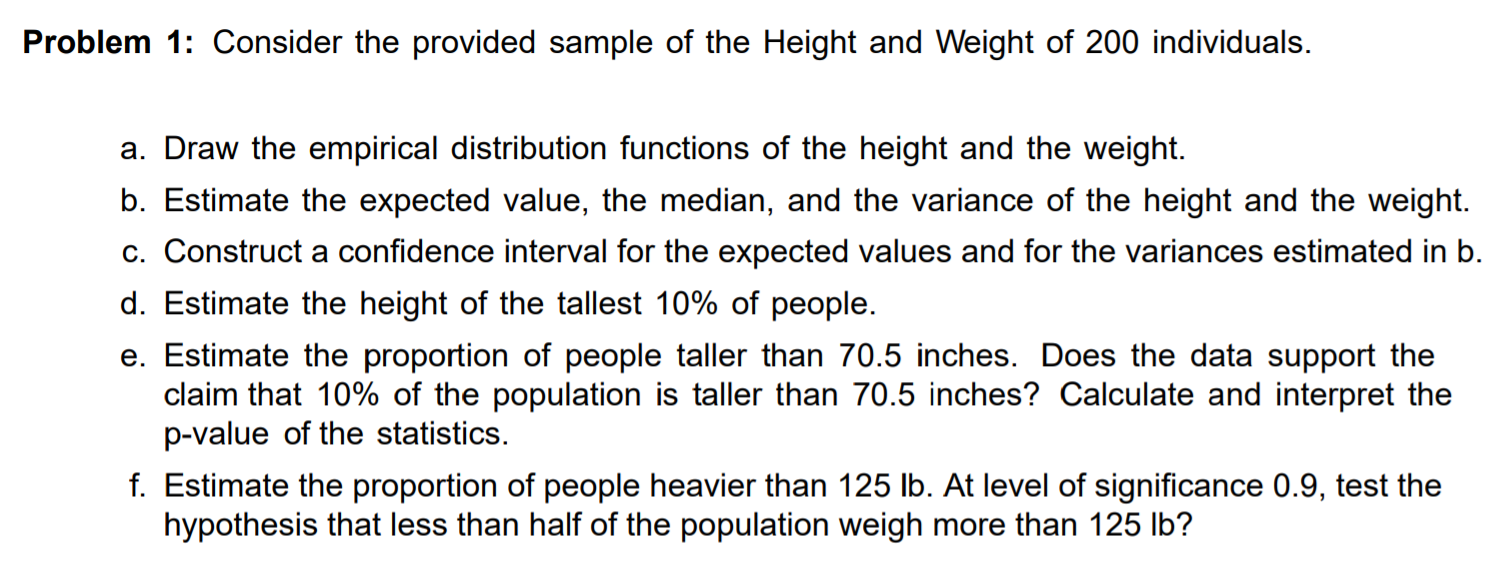

In [143]:
#Problem 1a: Draw Empirical Distribution Function of Height/Weight:

In [144]:
def gen_empirical(lst, labels):
    sample = lst
    ecdf = sm.distributions.ECDF(sample)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.step(x, y)
    plt.show()

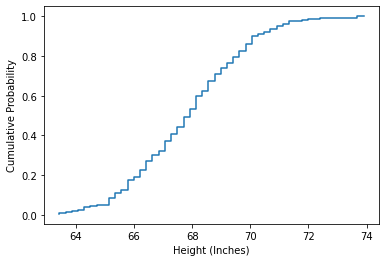

In [145]:
gen_empirical(df["Height(Inches)"], ["Height (Inches)", "Cumulative Probability"])

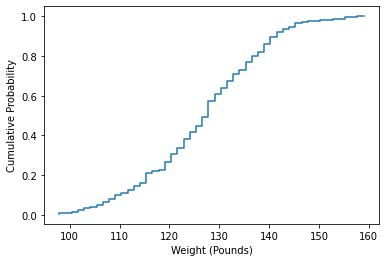

In [146]:
gen_empirical(df["Weight(Pounds)"], ["Weight (Pounds)", "Cumulative Probability"])

In [147]:
#Problem 1b: Solve E[X], Median, V[X] of Height/Weight

In [148]:
def emp_exp(lst):
    return (1/len(lst))*sum(lst)

In [149]:
#Expected Value
print("Expected Value of Height:", emp_exp(df["Height(Inches)"]))
print("Expected Value of Weight:", emp_exp(df["Weight(Pounds)"]))

Expected Value of Height: 67.94992374641424
Expected Value of Weight: 127.22237668759277


In [150]:
def emp_med(lst):
    temp_lst = np.sort(lst)
    if len(lst)%2==0:
        return (temp_lst[int(len(lst)/2)] + temp_lst[int(len(lst)/2 + 1)])/2
    else:
        return temp_lst[ceil(len(lst)/2)]

In [151]:
#Median
print("Median of Height:", emp_med(df["Height(Inches)"]))
print("Median of Weight:", emp_med(df["Weight(Pounds)"]))

Median of Height: 67.95440495544304
Median of Weight: 127.975189394784


In [152]:
def emp_var(lst):
    return emp_exp(lst**2) - emp_exp(lst)**2

In [153]:
#Variance
print("Variance of Height:", emp_var(df["Height(Inches)"]))
print("Variance of Weight:", emp_var(df["Weight(Pounds)"]))

Variance of Height: 3.7471681615961643
Variance of Weight: 142.3499411748835


In [154]:
#Problem 1c: Construct CI for Expected Value and Variance

In [155]:
def emp_CI_exp(lst, conf=.95):
    return st.t.interval(alpha=conf, df=len(lst)-1, loc=np.mean(lst), scale=st.sem(lst)) 

def emp_CI_var(lst, alpha=.05):
    n = len(lst)
    var = emp_var(lst)
    df = n-1
    return ((n-1)*var)/(st.chi2.ppf(1 - alpha/2, df)), ((n-1)*var)/(st.chi2.ppf(alpha/2, df))
    
    

In [156]:
print("Confidence Interval of Exp. Value of Height:", emp_CI_exp(df["Height(Inches)"]))
print("Confidence Interval of Exp. Value of Weight:", emp_CI_exp(df["Weight(Pounds)"]))

print("\nConfidence Interval of Variance of Height:", emp_CI_var(df["Height(Inches)"]))
print("Confidence Interval of Variance of Weight:", emp_CI_var(df["Weight(Pounds)"]))

Confidence Interval of Exp. Value of Height: (67.67932711013094, 68.22052038269754)
Confidence Interval of Exp. Value of Weight: (125.55455564856244, 128.89019772662311)

Confidence Interval of Variance of Height: (3.107548978553992, 4.607946953501831)
Confidence Interval of Variance of Weight: (118.05165800373373, 175.04978412513012)


In [157]:
def emp_quant(lst, q):
    temp_lst = np.sort(lst)
    nq = math.ceil(len(lst)*(q))
    return temp_lst[nq]

In [158]:
#Problem 1d: Height of the tallest 10% of people
q=.1
print(f"Height of tallest {q*100}% of people:", emp_quant(df["Height(Inches)"], 1-q))

Height of tallest 10.0% of people: 70.2693941009668


In [159]:
def more_than(lst, val):
    return len(np.sort(lst[~(lst<val)]))/len(lst)

In [160]:
#Problem 1e: Does the data support the claim that 10% of the population is taller than 70.5 inches
taller_than = 70.5
print(f"Population taller than {taller_than} inches:", 100*more_than(df["Height(Inches)"], taller_than), "%")
"Therefore, the data does not support the claim that 10% of the population is taller than 70.5 inches"

Population taller than 70.5 inches: 9.0 %


'Therefore, the data does not support the claim that 10% of the population is taller than 70.5 inches'

In [161]:
#Calculate P-Value
def p_val_mt(lst, val):
    return 2*more_than(lst, val)

In [162]:
print("Since we are looking at an edge of a density curve, the p-value is twice the probability of the 'more than' event occuring")
print(f"The P-Value of the Population that is taller than {taller_than} inches:", p_val_mt(df["Height(Inches)"], taller_than))
print("\nSince the P-Value is a significantly high (P > .05), we cannot reject the Null Hypothesis, as there is not a significant difference between the claim and the estimation")

Since we are looking at an edge of a density curve, the p-value is twice the probability of the 'more than' event occuring
The P-Value of the Population that is taller than 70.5 inches: 0.18

Since the P-Value is a significantly high (P > .05), we cannot reject the Null Hypothesis, as there is not a significant difference between the claim and the estimation


In [163]:
#Problem 1f Estimate the proportion of people heavier than 125 lb. At level of significance 0.9, test the
# hypothesis that less than half of the population weigh more than 125 lb?

In [164]:
heavier_than = 125
print(f"Population heavier than {heavier_than} lb:", 100*more_than(df["Weight(Pounds)"], heavier_than), "%")

Population heavier than 125 lb: 58.5 %


In [165]:
def less_than(lst, val):
    return len(np.sort(lst[~(lst>val)]))/len(lst)

#Calculate P-Value
def p_val_lt(lst, val):
    return 2*less_than(lst, val)

In [166]:
print(f"The P-Value of the Population that is heavier than {heavier_than} lb:", p_val_lt(df["Weight(Pounds)"], heavier_than))
print("\nSince the P-Value is less than our level of significance  (P < .9), we reject the Null Hypothesis, as there is a significant difference between the claim and the estimation")

The P-Value of the Population that is heavier than 125 lb: 0.83

Since the P-Value is less than our level of significance  (P < .9), we reject the Null Hypothesis, as there is a significant difference between the claim and the estimation


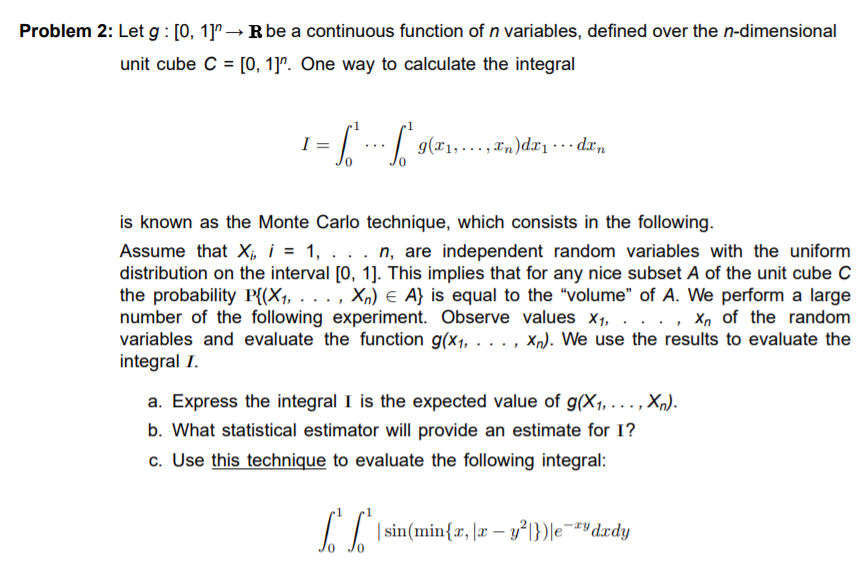

Problem 2a: Integral $I$ as the expected value of $g(X_1, \cdots, X_n)$

For short form, lets express $X = X_1 \cdots X_n$

And where the PDF of a given function is given as $f(x)$
$$E[g(X)] = \int_0^1 \cdots \int_0^1 g(x) f(x) dx_1 \cdots dx_n$$

Problem 2b: Statistical Estimator for $I$

$\theta = E[g(X)], \text{where } X = X_1 \cdots X_n \text{ as } n \rightarrow \infty$

In [1]:
#Problem 3c, solve via Monte Carlo
#First lets set up the function
f = lambda x,y: abs(math.sin(min(x, abs(x-y**2))))*math.exp(-x*y)

In [168]:
def in_3d_graph(f, pt):
    #Checks if a given point on a 3d plane is under the curve of a given function
    return pt[2] < f(pt[0], pt[1])

def monte_carlo_3d(f, its=10000):
    #If the area of the cube we want to integrate between is 1x1x1, then to solve a monte carlo approximation
    #of f(x), we just take the len of random variables under the curve, divided by those outside the curve
    #multiplied by the volume of the cube, which in this case is 1x1x1 = 1
    seen = []
    f_s = []
    
    for i in range(its):
        x,y,z= np.random.random(3)
        arr = [x,y,z]
        
        if arr not in seen and in_3d_graph(f, arr):
            seen.append(arr)
            
    return len(seen)/its

In [169]:
monte_carlo_3d(f, 10000)

0.2407

For the integral $\int_0^1 \int_0^1 |sin((min\{x, |x-y^2|\}))|e^{-xy} dydx$

Monte Carlo Approximation Results:
$$100 \text{ intervals: } 0.31$$

$$1000 \text{ intervals: } 0.233$$

$$10000 \text{ intervals: } 0.2369$$

$$50000 \text{ intervals: } 0.23758$$

$$100000 \text{ intervals: } 0.23971$$

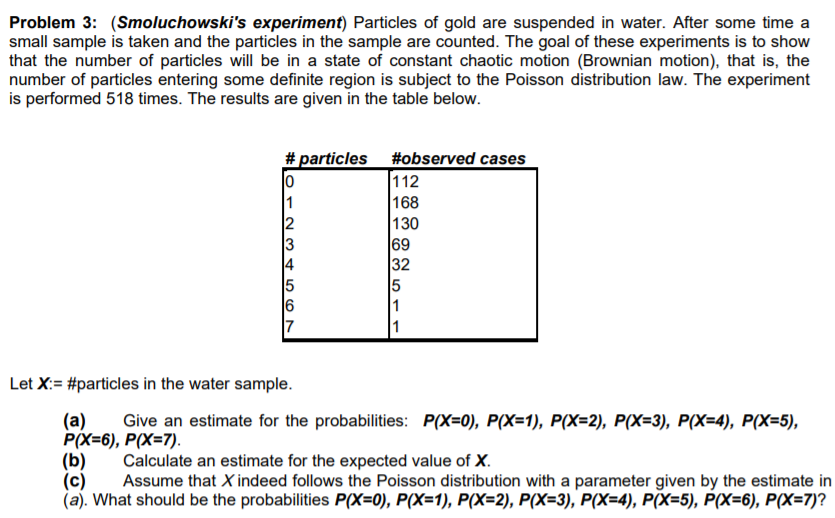

In [170]:
df_gld = pd.read_excel("Data-Particles.xlsx")
df_gld

,Index,Particles,Observed
0,1,0,112
1,2,1,168
2,3,2,130
3,4,3,69
4,5,4,32
5,6,5,5
6,7,6,1
7,8,7,1


In [171]:
sum(df_gld["Observed"])==518

True

In [172]:
#Problem 3a: Find the probabilites of all X=n, cases where n is the # of particles
def prob_lst(lst, indx):
    return round(lst[indx]/sum(lst), 3)

In [173]:
for i in range(len(df_gld["Observed"])):
    print(f"Probability of P(X={i}):", prob_lst(df_gld["Observed"], i))

Probability of P(X=0): 0.216
Probability of P(X=1): 0.324
Probability of P(X=2): 0.251
Probability of P(X=3): 0.133
Probability of P(X=4): 0.062
Probability of P(X=5): 0.01
Probability of P(X=6): 0.002
Probability of P(X=7): 0.002


In [174]:
#Problem 3b: Solve E[X]
def exp_val(lst):
    return round(sum(prob_lst(lst,i)*lst[i] for i in range(len(lst))), 3)

In [175]:
print("Expected Value of Observed Particles:", exp_val(df_gld["Observed"]))

Expected Value of Observed Particles: 122.469


In [176]:
def pois_dist(lst, indx):
    lmb = round(prob_lst(lst, indx), 3)
    return round(((lmb**indx)*math.exp(-lmb))/(math.factorial(indx)), 3)

In [177]:
#Problem 3c: Probabilites given a Poisson Dist.
for i in range(len(df_gld["Observed"])):
    print(f"Probability of P(X={i}), given X ~ Poisson({prob_lst(df_gld['Observed'], i)}):", pois_dist(df_gld["Observed"], i))

Probability of P(X=0), given X ~ Poisson(0.216): 0.806
Probability of P(X=1), given X ~ Poisson(0.324): 0.234
Probability of P(X=2), given X ~ Poisson(0.251): 0.025
Probability of P(X=3), given X ~ Poisson(0.133): 0.0
Probability of P(X=4), given X ~ Poisson(0.062): 0.0
Probability of P(X=5), given X ~ Poisson(0.01): 0.0
Probability of P(X=6), given X ~ Poisson(0.002): 0.0
Probability of P(X=7), given X ~ Poisson(0.002): 0.0


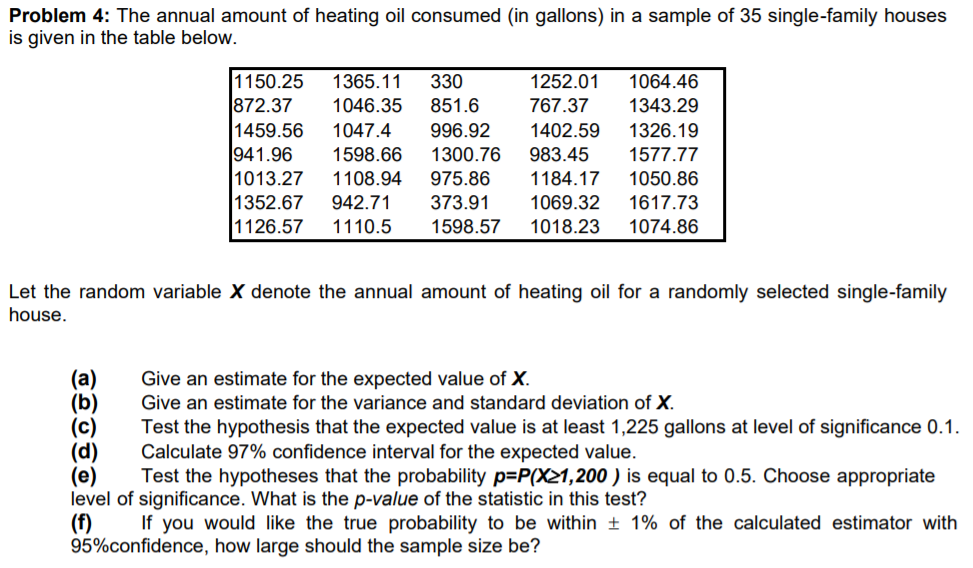

In [178]:
df_oil = pd.read_excel("Data-Oil.xlsx")
df_oil.head()

,Index,Oil Cons. (Gallons)
0,1,1150.25
1,2,872.37
2,3,1459.56
3,4,941.96
4,5,1013.27


In [179]:
def exp_val_equal(lst):
    return sum(lst)/(len(lst))

In [180]:
#Problem 4a: Calculate E[X]
exp_val_equal(df_oil["Oil Cons. (Gallons)"])

1122.749714285714

In [181]:
#Problem 4b: Calculate V[X] and STD
print("Variance of Oil Consumption: ", round(pysts.variance(df_oil["Oil Cons. (Gallons)"]), 3))
print("Standard Deviation of Oil Consumption: ", round(math.sqrt(pysts.variance(df_oil["Oil Cons. (Gallons)"])), 3))

Variance of Oil Consumption:  87452.234
Standard Deviation of Oil Consumption:  295.723


In [182]:
#Problem 4c Hypothesis Test that Oil Cons. is >= 1225 w/ P < .1
oil = 1225

print(f"Oil Cons. thats at least {oil}:", round(100*more_than(df_oil["Oil Cons. (Gallons)"], oil),3), "%")
print(f"P-Value of Oil. Cons. thats at least {oil}:", round(p_val_mt(df_oil["Oil Cons. (Gallons)"], oil), 3))
"Since P > .1 we cannot reject the Null Hypothesis, as there is not a significant difference between the claim and the estimation"



Oil Cons. thats at least 1225: 34.286 %
P-Value of Oil. Cons. thats at least 1225: 0.686


'Since P > .1 we cannot reject the Null Hypothesis, as there is not a significant difference between the claim and the estimation'

In [183]:
#Problem 4d Calculate CI 97% of E[X]
print("97% CI for Exp. Value for Oil Cons.: ", emp_CI_exp(df_oil["Oil Cons. (Gallons)"], conf=.97))

97% CI for Exp. Value for Oil Cons.:  (1009.5301831501979, 1235.9692454212309)


In [184]:
#Problem 4e Test the Hypothesis that P(X>=1200)=.5
#For the sake of the problem, lets have the level of significance be .01, implying the claim is likely 99% true
oil_2 = 1200
print(f"Oil Cons. that P(X>={oil_2}):", round(100*more_than(df_oil["Oil Cons. (Gallons)"], oil_2),3), "%")
print(f"P-Value of Oil. Cons. that P(X>={oil_2}):", round(p_val_mt(df_oil["Oil Cons. (Gallons)"], oil_2), 3))
"Since P > .01 we cannot reject the Null Hypothesis, as there is not a significant difference between the claim and the estimation"

Oil Cons. that P(X>=1200): 34.286 %
P-Value of Oil. Cons. that P(X>=1200): 0.686


'Since P > .01 we cannot reject the Null Hypothesis, as there is not a significant difference between the claim and the estimation'

In [185]:
#Problem 4f What should n be, if you want the true probability to be +- 1% of calculated estimator w/ 95% CI

In [186]:
def sample_size_req(lst, CI, m_p):
    #To solve sample size required for problem, use the formula:
    # n = (phi(std/M))^2
    norm = st.norm.ppf(1-((1-CI)/2))
    std = round(math.sqrt(pysts.variance(lst)), 3)
    M = m_p*exp_val_equal(df_oil["Oil Cons. (Gallons)"])
    
    return math.ceil((norm*(std/M))**2)

In [187]:
CI_req = .95
margin = .01
sample_req = sample_size_req(df_oil["Oil Cons. (Gallons)"], CI_req, margin)
print("Sample size required to make true probability +- 1% of calculated estimator w/ 95% CI:", sample_req)

Sample size required to make true probability +- 1% of calculated estimator w/ 95% CI: 2666
